# Dataset source: https://www.kaggle.com/omkarborikar/top-10000-popular-movies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot


In [2]:
init_notebook_mode(connected=True)

In [3]:
cf.go_offline()

#### Reads the dataset and then displays information about each column of data.

In [4]:
mov_df = pd.read_csv("Top_10000_Popular_Movies.csv")

mov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   id                 10000 non-null  int64  
 2   original_language  10000 non-null  object 
 3   original_title     10000 non-null  object 
 4   popularity         10000 non-null  float64
 5   release_date       9960 non-null   object 
 6   vote_average       10000 non-null  float64
 7   vote_count         10000 non-null  int64  
 8   genre              10000 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 703.2+ KB


#### Removes a duplicate column (gets rid of having to see two index columns)

In [5]:
mov_df.drop(columns=["Unnamed: 0"], inplace=True)

#### Displays some basic information regarding the data, specific columns with numerical data. Note: The "id" column can be ignored.

In [6]:
mov_df.describe()

,id,popularity,vote_average,vote_count
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,252337.58590,34.984327,6.300120,1304.033700
std,262027.02199,130.544472,1.463785,2487.256212
min,5.00000,5.840000,0.000000,0.000000
25%,11638.75000,11.772750,5.900000,109.000000
50%,150207.50000,15.972000,6.500000,433.000000
75%,456957.00000,27.480500,7.100000,1282.000000
max,884239.00000,8222.616000,10.000000,30043.000000


#### Displays the first five and last five entries of the dataset.

In [7]:
mov_df

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre
0,580489,en,Venom: Let There Be Carnage,8222.616,2021-09-30,7.0,828,"['Science Fiction', 'Action']"
1,335983,en,Venom,3012.242,2018-09-28,6.8,11846,"['Science Fiction', 'Action']"
2,550988,en,Free Guy,3864.616,2021-08-11,7.8,2908,"['Comedy', 'Action', 'Adventure', 'Science Fic..."
3,772436,es,"Matando Cabos 2, La Máscara del Máscara",2556.789,2021-10-01,7.7,34,"['Action', 'Comedy', 'Adventure']"
4,568620,en,Snake Eyes: G.I. Joe Origins,2164.071,2021-07-22,6.9,685,"['Action', 'Adventure']"
...,...,...,...,...,...,...,...,...
9995,34653,en,A Single Man,11.647,2009-10-19,7.3,1209,"['Romance', 'Drama']"
9996,33518,en,Alligator,9.894,1980-07-02,5.8,182,"['Horror', 'Science Fiction', 'Thriller']"
9997,26320,en,Taking Woodstock,9.197,2009-08-26,6.2,321,"['Music', 'Comedy', 'Drama']"
9998,287318,en,3 Scream Queens,7.350,2014-11-25,5.2,5,['Horror']


#### Displays the amount of film entries, based on language code, limited to the top 5.

In [8]:
mov_df["original_language"].value_counts().head()

en    7761
ja     594
es     460
fr     298
ko     154
Name: original_language, dtype: int64

#### Displays the amount of film entries, based on language code, limited to the bottom 5.

In [9]:
mov_df["original_language"].value_counts().tail()

la    1
uk    1
ca    1
bn    1
ku    1
Name: original_language, dtype: int64

#### Displays the amount of film entries which share the same name. 

In [10]:
mov_df["original_title"].value_counts()

Venom                  5
Les Misérables         3
The Little Mermaid     3
Carrie                 3
Porno                  3
                      ..
All My Life            1
Extraterrestre         1
American Hustle        1
Blood of Redemption    1
Terminator II          1
Name: original_title, Length: 9768, dtype: int64

#### Displays the value counts for the top five and bottom five "release_date" values. 

In [11]:
mov_df["release_date"].value_counts()

2021-10-21    39
2021-10-15    25
2021-10-20    24
2021-10-08    20
2021-10-22    17
              ..
2000-10-17     1
2000-03-02     1
2008-09-30     1
2016-05-19     1
1989-08-22     1
Name: release_date, Length: 5668, dtype: int64

#### Displays the value counts for the top 5 and bottom 5 film genres. 

In [12]:
mov_df["genre"].value_counts()

['Drama']                                                               521
['Comedy']                                                              456
['Horror']                                                              264
['Documentary']                                                         228
['Horror', 'Thriller']                                                  218
                                                                       ... 
['Action', 'Adventure', 'Fantasy', 'TV Movie']                            1
['Animation', 'Family', 'Fantasy', 'Adventure', 'Comedy', 'Romance']      1
['Adventure', 'Horror', 'Comedy']                                         1
['Comedy', 'Adventure', 'Fantasy', 'Animation', 'Family']                 1
['Comedy', 'Romance', 'TV Movie', 'Drama']                                1
Name: genre, Length: 2303, dtype: int64

#### Displays the value counts for top five and bottom five "popularity" values. 

In [13]:
mov_df["popularity"].value_counts()

12.132    5
15.505    5
14.760    5
13.554    5
14.737    4
         ..
24.472    1
21.419    1
20.309    1
26.206    1
9.624     1
Name: popularity, Length: 8430, dtype: int64

#### Displays the value counts for the top five and bottom five "vote average" values. 

In [14]:
mov_df["vote_average"].value_counts()

6.7    426
6.5    420
6.3    418
6.4    414
6.8    411
      ... 
9.2      2
3.1      2
1.0      1
2.9      1
0.5      1
Name: vote_average, Length: 74, dtype: int64

#### Displays the value counts for the top five and bottom five "value count" values. 

In [15]:
mov_df["vote_count"].value_counts()

0       283
1       101
2        83
4        61
3        60
       ... 
9493      1
5688      1
2598      1
2064      1
321       1
Name: vote_count, Length: 3173, dtype: int64

#### Displays the dataset that is sorted by the "vote_average" column, displaying the top first five entries and bottom last five entries. * Note: These are the most highly and least highly averaged films.

In [16]:
mov_df.sort_values(by="vote_average", ascending=False)

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre
505,875828,en,Untitled Peaky Blinders Film,98.046,NaN,10.0,2,[]
8141,843141,en,Pokémon Live!,9.502,2016-09-24,10.0,1,"['Music', 'Comedy']"
9732,514466,fi,Supercool,5.907,2021-07-02,10.0,1,"['Comedy', 'Action']"
4964,794819,hi,रश्मि रॉकेट,13.048,2021-10-15,10.0,1,['Drama']
4354,584948,es,Eyes of Desire,15.329,1998-09-01,10.0,1,[]
...,...,...,...,...,...,...,...,...
3296,878863,en,A Second Chance,14.192,NaN,0.0,0,['Fantasy']
6852,504075,zh,战狼3,11.477,NaN,0.0,0,"['Action', 'War']"
3305,881460,en,Planet Dune,24.657,2021-10-29,0.0,0,"['Horror', 'Adventure', 'Science Fiction']"
6833,875104,zh,叶问宗师觉醒,11.785,2021-09-16,0.0,0,['Action']


#### Displays the dataset that is sorted by the "vote_count" column, displaying the top first five entries and bottom last five entries. * Note: These are the most voted and least voted films.

In [17]:
mov_df.sort_values(by="vote_count", ascending=False)

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre
242,27205,en,Inception,145.171,2010-07-15,8.3,30043,"['Action', 'Science Fiction', 'Adventure']"
520,157336,en,Interstellar,93.800,2014-11-05,8.3,26858,"['Adventure', 'Drama', 'Science Fiction']"
1037,155,en,The Dark Knight,66.044,2008-07-14,8.5,26004,"['Drama', 'Action', 'Crime', 'Thriller']"
272,293660,en,Deadpool,144.346,2016-02-09,7.6,25636,"['Action', 'Adventure', 'Comedy']"
150,24428,en,The Avengers,213.541,2012-04-25,7.7,25524,"['Science Fiction', 'Action', 'Adventure']"
...,...,...,...,...,...,...,...,...
7231,724334,en,My Hero Academia,15.645,NaN,0.0,0,[]
7226,666123,id,Roh Mati Paksa,17.690,2021-10-21,0.0,0,['Horror']
7198,824551,en,Doraemon: The Collection Part I,11.400,1969-01-01,0.0,0,"['Animation', 'Family']"
7184,447277,en,The Little Mermaid,10.437,2023-05-26,0.0,0,"['Adventure', 'Family', 'Fantasy', 'Romance']"


#### Displays the dataset that is sorted by the "popularity" column, displaying the top first five entries and bottom last five entries. * Note: These are the most popular and least popular films.

In [18]:
mov_df.sort_values(by="popularity", ascending=False)

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre
0,580489,en,Venom: Let There Be Carnage,8222.616,2021-09-30,7.0,828,"['Science Fiction', 'Action']"
2,550988,en,Free Guy,3864.616,2021-08-11,7.8,2908,"['Comedy', 'Action', 'Adventure', 'Science Fic..."
1,335983,en,Venom,3012.242,2018-09-28,6.8,11846,"['Science Fiction', 'Action']"
7,610253,en,Halloween Kills,2636.999,2021-10-14,7.5,447,"['Horror', 'Thriller']"
3,772436,es,"Matando Cabos 2, La Máscara del Máscara",2556.789,2021-10-01,7.7,34,"['Action', 'Comedy', 'Adventure']"
...,...,...,...,...,...,...,...,...
9515,608499,en,Saint-Narcisse,6.034,2021-09-24,2.0,1,"['Comedy', 'Drama', 'Romance']"
9560,40933,es,El bolero de Raquel,6.004,1957-10-09,6.9,60,['Comedy']
9988,38310,it,I pompieri,5.945,1985-10-25,5.8,223,['Comedy']
9732,514466,fi,Supercool,5.907,2021-07-02,10.0,1,"['Comedy', 'Action']"


<!-- ###### Displays the dataset that is sorted by the "popularity" column, displaying the top 10 most popular films.  -->

In [19]:
# mov_df.sort_values(by="popularity", ascending=False).head(10)

#### Displays the correlation values between the numerical data columns of the dataset.  * Note: The "id" column can be ignored.

In [20]:
mov_df.corr()

,id,popularity,vote_average,vote_count
id,1.000000,0.121851,-0.247567,-0.237103
popularity,0.121851,1.000000,0.045352,0.088182
vote_average,-0.247567,0.045352,1.000000,0.240653
vote_count,-0.237103,0.088182,0.240653,1.000000


#### Displays the amount of unique genre names.

In [21]:
num_of_genres = mov_df["genre"].value_counts().nunique()

print(f"There are {num_of_genres} unique genres.")

There are 65 unique genres.


#### Displays the amount of unique film titles.  * Note: This further shows that several film entries had duplicate titles.

In [22]:
num_of_titles = mov_df["original_title"].nunique()

print(f"There are {num_of_titles} unique film titles.")

There are 9768 unique film titles.


#### Displays a histogram that indicates the distribution of vote averages from 0 to 10. * Note: A majority of film entries appear to have vote averages between 5 and 8. Additionally, a fair amount of film entries were given a vote average of 0, which may mean such films did not receive any votes.

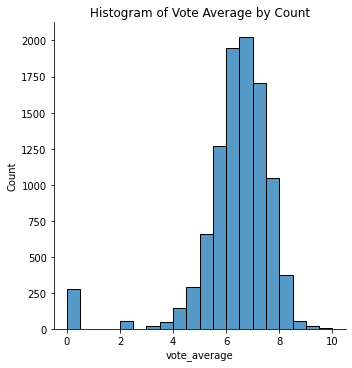

In [224]:
sns.displot(data=mov_df, x="vote_average", binwidth=0.5).set(title="Histogram of Vote Average by Count")

#### Displays a scatterplot between the "vote_average" and "vote_count" columns. *Note: This graph clearly shows a positive correlation between vote count and vote average, within a clear boundary. This boundary is between vote average values of about 3 and to about 8.2. 

[Text(0.5, 1.0, 'Scatter plot of Vote Average by Vote Count')]

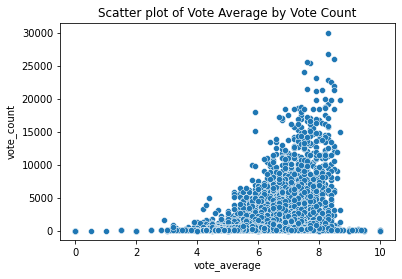

In [223]:
sns.scatterplot(data=mov_df, x="vote_average", y="vote_count").set(title="Scatter plot of Vote Average by Vote Count")

# Simple Recommender 

### This section includes code that displays the most recommended (or least recommended) movies based on scores assigned to each movie in the dataset, given the following formula. * Note: This score is completely unrelated to the "popularity" column:

### Weighted Rating (WR) = (v/v + m * R) + (m/v + m * C)

### v = number of votes for the movie
### m = minimum votes required to to be listed in the chart
### R = average rating of the movie
### C = mean vote across the whole report

# Source for this formula: https://www.datacamp.com/community/tutorials/recommender-systems-python

In [25]:
C = mov_df["vote_average"].mean()
C

6.30012

In [26]:
m = mov_df["vote_count"].quantile(0.90)
m

3416.2000000000007

In [27]:
mov_scored = mov_df.copy().loc[mov_df["vote_count"] >= m]
mov_scored.shape

(1000, 8)

In [28]:
def weighted_rating(x, m=m, C=C):
    v = x["vote_count"]
    R = x["vote_average"]
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

#### Creation of a new dataframe, "mov_scored", that is based on a sub-data frame using the "vote_count" data which had a unique function, "weighted_rating", applied to it. * Note: This new dataframe is not influenced by the "popularity" column from the original "mov_df" dataframe.

In [29]:
mov_scored["score"] = mov_scored.apply(weighted_rating, axis=1)

In [30]:
mov_scored = mov_scored.sort_values("score", ascending=False)

#### Top 10 films with the highest scores.

In [31]:
mov_scored[["original_title", "vote_count", "vote_average", "score"]].head(10)

,original_title,vote_count,vote_average,score
937,The Shawshank Redemption,19908,8.7,8.348499
777,The Godfather,14928,8.7,8.253076
1037,The Dark Knight,26004,8.5,8.244555
1333,Pulp Fiction,21922,8.5,8.203403
1374,Forrest Gump,21403,8.5,8.197201
636,The Lord of the Rings: The Return of the King,18429,8.5,8.155978
1217,Fight Club,22613,8.4,8.124401
242,Inception,30043,8.3,8.095811
602,The Lord of the Rings: The Fellowship of the Ring,19849,8.4,8.091659
1991,Schindler's List,11931,8.6,8.088060


#### Bottom 10 films with the lowest scores. 

In [32]:
mov_scored[["original_title", "vote_count", "vote_average", "score"]].tail(10)

,original_title,vote_count,vote_average,score
1002,Ghostbusters,5166,5.4,5.758299
824,Jupiter Ascending,5639,5.4,5.739583
2841,Daredevil,3948,5.2,5.710338
1898,Assassin's Creed,6522,5.4,5.709411
848,A Good Day to Die Hard,5335,5.3,5.690416
1011,Independence Day: Resurgence,5027,5.2,5.645119
992,After Earth,5561,5.2,5.618642
432,Green Lantern,5874,5.2,5.604537
2763,Batman & Robin,3863,4.3,5.238676
931,Fantastic Four,4919,4.4,5.178768


# Plotly section

### This section features additional graphs, which are more interactive than the previous ones rendered through the Seaborn library. 

### The graphs in this section were rendered using Plotly.

In [214]:
mov_df["vote_average"].iplot(title="Vote Average by Count", xTitle="Vote Average (0 to 10)", yTitle="Count", kind="hist", bins=10)

In [110]:
mov_df["vote_count"].iplot(title="Vote Count by Count", xTitle="Vote Count", yTitle="Count", kind="hist", bins=10)

In [137]:
mov_df["popularity"].head(500).iplot(title="Popularity Histogram - 500 Most Popular Films", xTitle="Popularity Score", yTitle="Count", kind="hist")

In [138]:
mov_df["popularity"].tail(500).iplot(title="Popularity Histogram - 500 Least Popular Films", xTitle="Popularity Score", yTitle="Count", kind="hist")

In [142]:
# mov_df[["vote_count", "popularity"]].iplot(kind="spread")

In [184]:
mov_df["genre"].value_counts().head(5).iplot(title="Genre Bar Plot - 5 Most Popular Genres", xTitle="Genre", yTitle="Count", kind="bar")

In [185]:
mov_df["genre"].value_counts().tail(5).iplot(title="Genre Bar Plot - 5 Least Popular Genres", xTitle="Genre", yTitle="Count", kind="bar")